In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
class Graph:
    def __init__(self):
        self.adjlist = dict()
        self.g = nx.Graph()
        
    def addedge(self, u, v, w):
        if u in self.adjlist:
            self.adjlist[u][v] = w
        else:
            self.adjlist[u] = {v:w}
        
        if v in self.adjlist:
            self.adjlist[v][u] = w
        else:
            self.adjlist[v] = {u:w}
            
        self.g.add_edge(u, v, weight=w)
        
    def visualize(self):   
        plt.figure(figsize=(15, 15))
        pos = nx.kamada_kawai_layout(self.g)
        nx.draw(self.g, pos=pos, with_labels=True, node_size=1500, alpha=0.8)
        edge_labels = nx.get_edge_attributes(self.g, "weight")
        nx.draw_networkx_edge_labels(self.g, pos, edge_labels=edge_labels)
        plt.show()
        
    def visualizepath(self, path):
        edges = []
        
        for i in range(len(path)-1):
            edges.append((path[i], path[i+1]))
            
        plt.figure(figsize=(15, 15))
        pos = nx.kamada_kawai_layout(self.g)
        nx.draw(self.g, pos=pos, with_labels=True, node_size=2000, alpha=0.8)
        nx.draw_networkx_nodes(self.g, pos=pos, nodelist=path, node_color='g', node_size=1800)
        nx.draw_networkx_edges(self.g, pos, edgelist=edges, width=3, edge_color='r', alpha=1)
        edge_labels = nx.get_edge_attributes(self.g, "weight")
        nx.draw_networkx_edge_labels(self.g, pos, edge_labels=edge_labels)
        plt.show()

In [3]:
class PQueue:
    def __init__(self):
        self.queue = []
        
    def isEmpty(self):
        return len(self.queue) == 0
    
    def enqueue(self, eleid, ele, pri):
        self.queue.append((eleid, ele, pri))
    
    def dequeue(self):
        if self.isEmpty():
            return None
        
        minidx = None
        minpri = None
        for i in range(len(self.queue)):
            eleid, ele, pri = self.queue[i]
            
            if minpri == None or pri < minpri:
                minidx = i
                minpri = pri
        
        eleid, ele, pri = self.queue.pop(minidx)
        
        return eleid, ele, pri
    
    def contains(self, eleid):
        for eid, ele, p in self.queue:
            if eleid == eid:
                return p
        
        return None
    
    def replace(self, eleid, ele, pri):
        for i in range(len(self.queue)):
            eid, e, p = self.queue[i]
            if eid == eleid:
                self.queue.pop(i)
                self.enqueue(eleid, ele, pri)
                return 

In [4]:
def uniformcostsearch(g, start, end):
    q = PQueue()
    q.enqueue(start, [start], 0)
    
    visited = set()
    
    while not q.isEmpty():
        lastnode, path, cost = q.dequeue()
        
        if lastnode == end:
            return path, cost
        
        visited.add(lastnode)
        
        for i in g.adjlist[lastnode]:
            new_cost = cost + g.adjlist[lastnode][i]
            new_path = path[:]
            new_path.append(i)
            if i not in visited and q.contains(i) == None:
                q.enqueue(i, new_path, new_cost)
            else:
                prev_cost = q.contains(i)
                    
                if prev_cost != None and prev_cost > new_cost:
                    q.replace(i, new_path, new_cost)
    
    return None, None

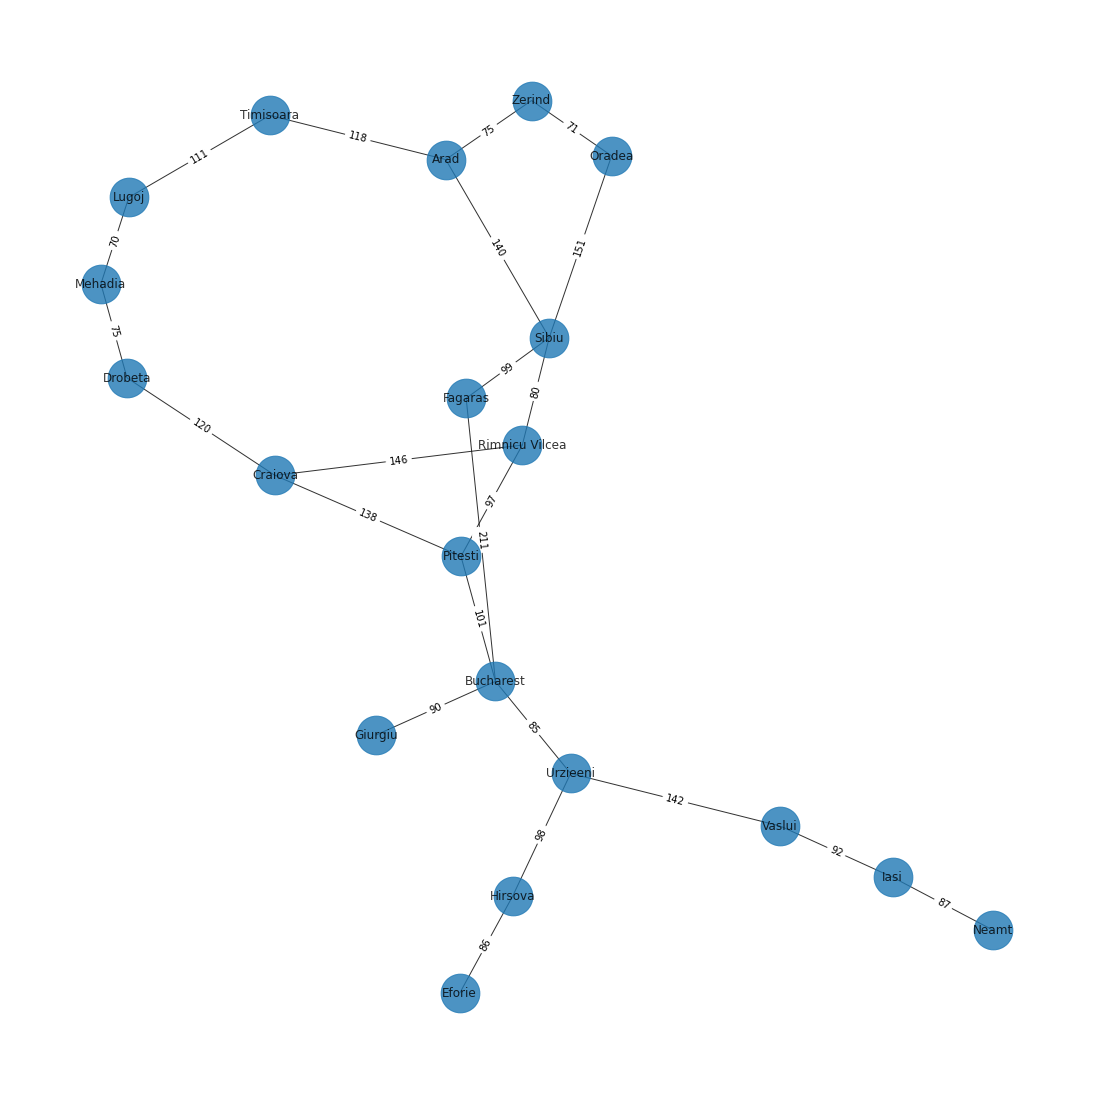

In [5]:
edges = [
    ('Oradea', 'Zerind', 71),
    ('Oradea', 'Sibiu', 151),
    ('Zerind', 'Arad', 75),
    ('Arad', 'Sibiu', 140),
    ('Arad', 'Timisoara', 118),
    ('Timisoara', 'Lugoj', 111),
    ('Lugoj', 'Mehadia', 70),
    ('Mehadia', 'Drobeta', 75),
    ('Drobeta', 'Craiova', 120),
    ('Sibiu', 'Fagaras', 99),
    ('Sibiu', 'Rimnicu Vilcea', 80),
    ('Rimnicu Vilcea', 'Craiova', 146),
    ('Rimnicu Vilcea', 'Pitesti', 97),
    ('Craiova', 'Pitesti', 138),
    ('Fagaras', 'Bucharest', 211),
    ('Pitesti', 'Bucharest', 101),
    ('Bucharest', 'Giurgiu', 90),
    ('Bucharest', 'Urzieeni', 85),
    ('Urzieeni', 'Vaslui', 142),
    ('Urzieeni', 'Hirsova', 98),
    ('Vaslui', 'Iasi', 92),
    ('Iasi', 'Neamt', 87),
    ('Hirsova', 'Eforie', 86)
]

g = Graph()
for u, v, w in edges:
    g.addedge(u, v, w)
    
g.visualize()

Minimum cost from Oradea to Drobeta is 497


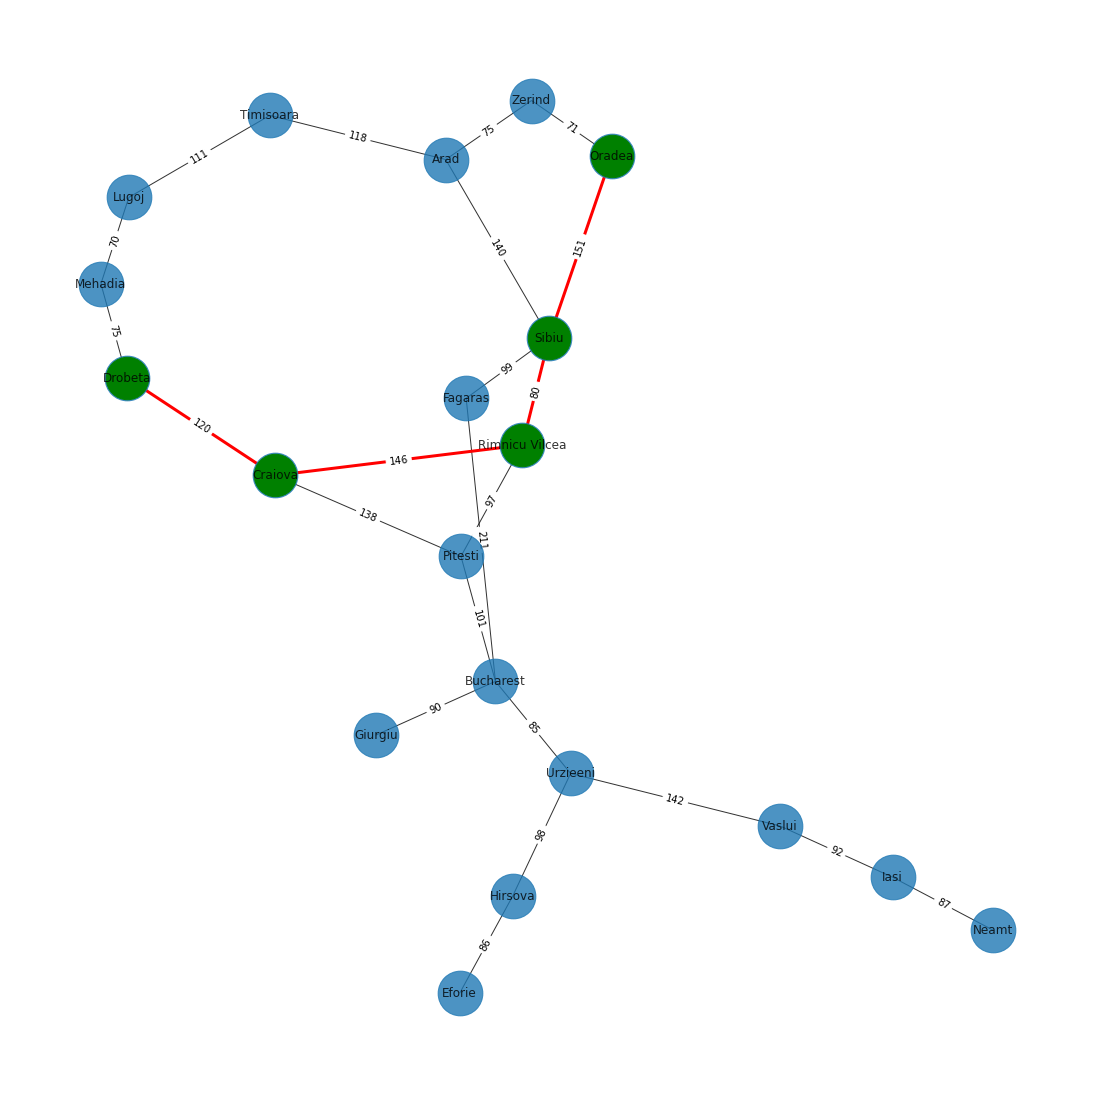

In [7]:
start = 'Oradea'
end = 'Drobeta'

minpath, mincost = uniformcostsearch(g, start, end)

if mincost != None:
    print(f"Minimum cost from {start} to {end} is {mincost}")
    g.visualizepath(minpath)
else:
    print(f"No path available from {start} to {end}...")